In [1]:
%matplotlib inline
import pandas
import numpy as np

from math import factorial
from scipy.stats import ttest_ind as mr_t
import matplotlib.pyplot as plt
import scipy.stats as sp

# from scipy.stats import mode
# from sklearn import neighbors
# from sklearn.neighbors import DistanceMetric 
# from pprint import pprint


titanic_train = pandas.read_csv('raw_data/train_titanic.csv', header=0)
# titanic_train.head(5)

#### Find the probability that...

a passenger survived (mandatory)

In [2]:
survived = titanic_train[titanic_train.Survived == 1]
survived_percentage = len(survived)/len(titanic_train)
print(survived_percentage)

0.3838383838383838


38% of the passengers in our data survived.

#### Find the probability that...

[x] a passenger was male

[x] a passenger was female and had at least one sibling or spouse on board

[ ] a survivor was from Cherbourg

In [3]:
print("A passenger was male: {0}\n".format((titanic_train.Sex == 'male').sum()/len(titanic_train)))

female_wSibling = (titanic_train.loc[(titanic_train.Sex == 'female') & (titanic_train.SibSp >= 1)]).count()
print("A passenger was female and had at least\none sibling or spouse on board: {0}\n"
    .format((female_wSibling.PassengerId/len(titanic_train)))
    )

cherbourg_survivors = titanic_train[(titanic_train.Survived == 1) & (titanic_train.Embarked == "C")]
ch_survived_percent = len(cherbourg_survivors)/len(survived)
print("A survivor was from Cherbourg {0}\n"
      .format(ch_survived_percent)
     )

A passenger was male: 0.6475869809203143

A passenger was female and had at least
one sibling or spouse on board: 0.15712682379349047

A survivor was from Cherbourg 0.2719298245614035



#### Plot the distribution of passenger ages. 

Choose visually-meaningful bin sizes and label your axes

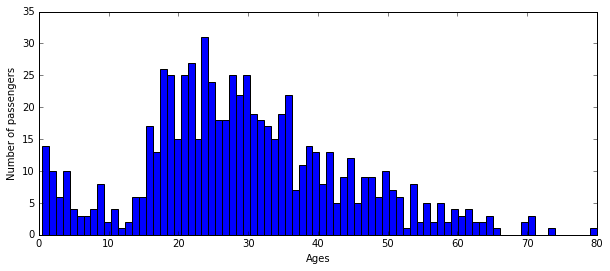

In [4]:
ages = titanic_train.Age.dropna()
H, edges = np.histogram(ages, bins=80)

plt.figure(figsize=(10,4))
ax = plt.subplot(111)
ax.bar(edges[:-1], H, width=edges[1] - edges[0])
ax.set_xlabel('Ages')
ax.set_ylabel('Number of passengers')
plt.show()

#### Find the probability that (choose one)...

[ ] a passenger was less than 10 years old

[x] a passenger was between 25 and 40 years old

[ ] a passenger was either younger than 20 years old or older than 50

In [5]:
btw_25_40 = titanic_train[(titanic_train.Age <= 40) & (titanic_train.Age >= 25)]
age_25_40_perc = btw_25_40.Age.count()/titanic_train.Age.count()
print(age_25_40_perc)

0.40056022409


40% of passengers were between the age of 25 and 40.

#### Knowing nothing else about the passengers aside from the survival rate of the population (the first question), if I choose 100 passengers at random from the passenger list, what’s the probability that exactly 42 passengers survive?

In [6]:
import math
a = math.factorial(100)
b = math.factorial(58)
c = math.factorial(42)
d = (.38)**42
e = (.62)**58
print((a/(b*c))*d*e)

0.05764782161231151


In [7]:
from scipy.stats import binom

binom.pmf(42, 100, 0.38)

0.057647821612310038

Using the survival probability of 38%, there is a 5% chance that exactly 42 will survive from a random selection of 100 passengers

#### What’s the probability that at least 42 of those 100 passengers survive?

In [8]:
prob_42 = binom.cdf(42, 100, 0.38)
print(1 - prob_42)

0.176643990901


There is a 18% chance that from a list of 100 passengers at least 42 will survive.

#### Is there a statistically significant difference between...
(If so, at what level? If not, how do you know?)

...the ages of male and female survivors?

YES (p-value= 0.012)

...the fares paid by passengers from Queenstown and the passengers from Cherbourg?

NO (p-value= 2.264)

In [9]:
crazy_train = titanic_train.fillna(titanic_train['Age'].mean())

crazy_males = crazy_train.loc[crazy_train.Sex == "male"]
crazy_females = crazy_train.loc[crazy_train.Sex == "female"]

print("Total Males: {0}".format(crazy_males.PassengerId.count()))
print("Total Females: {0}\n".format(crazy_females.PassengerId.count()))

t_stat, p_value = mr_t(crazy_males.Age, crazy_females.Age)
print("t_stat:\t", t_stat, "\np_value:", p_value)

Total Males: 577
Total Females: 314

t_stat:	 2.51805965098 
p_value: 0.0119749830068


In [10]:
crazy_town = titanic_train

Queenstown = crazy_train.loc[crazy_train.Embarked == "Q"]
Cherbourg = crazy_train.loc[crazy_train.Embarked == "C"]

print("Total Queenstown: {0}".format(Queenstown.PassengerId.count()))
print("Total Cherbourg: {0}\n".format(Cherbourg.PassengerId.count()))

t_stat, p_value = mr_t(Queenstown.Fare, Cherbourg.Fare)
print("t_stat:\t", t_stat, "\np_value:", p_value)

Total Queenstown: 77
Total Cherbourg: 168

t_stat:	 -4.84438931299 
p_value: 2.26358809955e-06


#### Accompany your p-values with histograms showing the distributions of both compared populations

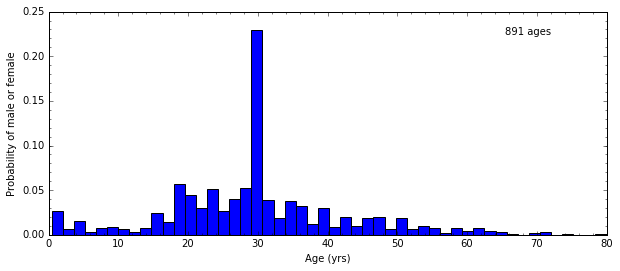

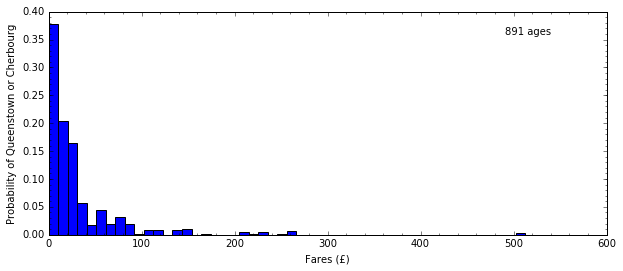

In [11]:
# crazy_train
H, edges = np.histogram(crazy_train.Age, bins=50)

plt.figure(figsize=(10, 4))
ax = plt.subplot(111)
ax.bar(edges[:-1], H / float(sum(H)), width=edges[1] - edges[0])
ax.text(0.9, 0.9, "%g ages" % len(crazy_train),
        horizontalalignment="right", transform=ax.transAxes)
ax.set_xlabel("Age (yrs)")
ax.set_ylabel("Probability of male or female")
ax.minorticks_on()
plt.show()

# crazy_town
H, edges = np.histogram(crazy_town.Fare, bins=50)

plt.figure(figsize=(10, 4))
ax = plt.subplot(111)
ax.bar(edges[:-1], H / float(sum(H)), width=edges[1] - edges[0])
ax.text(0.9, 0.9, "%g ages" % len(crazy_train),
        horizontalalignment="right", transform=ax.transAxes)
ax.set_xlabel("Fares (£)")
ax.set_ylabel("Probability of Queenstown or Cherbourg")
ax.minorticks_on()
plt.show()

#### *STRETCH GOAL* 

Write a function that takes N random samples of 100 passengers, and returns the fraction of those samples where at least 42 passengers survive. Choose a random seed and find approximately how many random samples you need to take before your fraction matches the probability you calculated (within Δp≈0.05Δp≈0.05).

It may help to visualize the survival fraction vs the number of random samples. Answers will vary based on the seed.